In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

# 加载数据

In [33]:
df = pd.read_csv('examples\CDNOW.txt', names=['userId', 'buyDate', 'buyCnt', 'buyAmount'], sep = '\s+')

In [34]:
df.head()

,userId,buyDate,buyCnt,buyAmount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [35]:
df.describe()

,userId,buyDate,buyCnt,buyAmount
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


核查数据是否存在nan

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
userId       69659 non-null int64
buyDate      69659 non-null int64
buyCnt       69659 non-null int64
buyAmount    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [41]:
df['buy_date'] = pd.to_datetime(df.buyDate, format = '%Y%m%d')

In [52]:
df['buy_month'] = df.buy_date.astype('datetime64[M]')

In [53]:
df.head()

,userId,buyDate,buyCnt,buyAmount,buy_date,buy_month
0,1,19970101,1,11.77,1997-01-01,1997-01-01
1,2,19970112,1,12.00,1997-01-12,1997-01-01
2,2,19970112,5,77.00,1997-01-12,1997-01-01
3,3,19970102,2,20.76,1997-01-02,1997-01-01
4,3,19970330,2,20.76,1997-03-30,1997-03-01


In [64]:
user_grouped = df.groupby('userId').sum()

In [65]:
user_grouped.head()

,buyDate,buyCnt,buyAmount
userId,,,
1,19970101,1,11.77
2,39940224,6,89.00
3,119833602,16,156.46
4,79882233,7,100.50
5,219686137,29,385.61


In [66]:
user_grouped.describe()

,buyDate,buyCnt,buyAmount
count,2.357000e+04,23570.000000,23570.000000
mean,5.902627e+07,7.122656,106.080426
std,9.460684e+07,16.983531,240.925195
min,1.997010e+07,1.000000,0.000000
25%,1.997021e+07,1.000000,19.970000
50%,1.997032e+07,3.000000,43.395000
75%,5.992125e+07,7.000000,106.475000
max,4.334408e+09,1033.000000,13990.930000


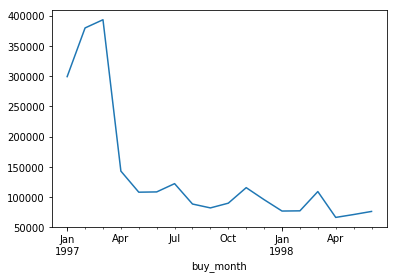

In [67]:
df.groupby('buy_month').buyAmount.sum().plot()

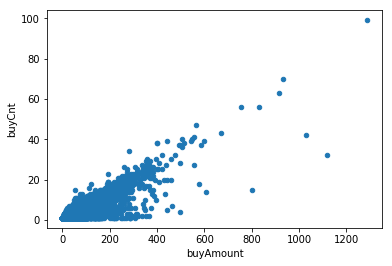

In [68]:
# 所有订单散点图
df.plot.scatter(x = 'buyAmount', y = 'buyCnt')

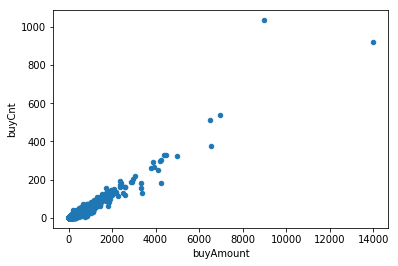

In [69]:
# 用户散点图
df.groupby('userId').sum().plot.scatter(x = 'buyAmount', y = 'buyCnt')

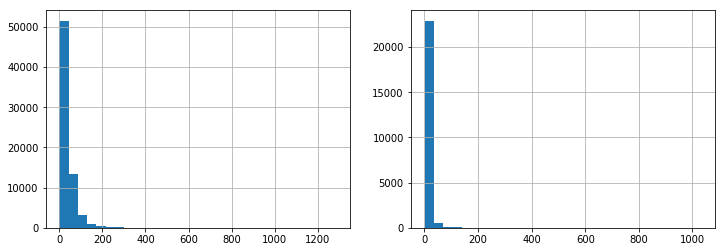

In [75]:
# 直方图
plt.figure(figsize = (12,4))
plt.subplot(121)
df.buyAmount.hist(bins = 30)
plt.subplot(122)
df.groupby('userId').buyCnt.sum().hist(bins = 30)